**Data 1**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv


In [2]:
import pandas as pd
data1 = pd.read_csv('Data1.csv')
df1 = data1.drop(['Unnamed: 0'],axis=1)

In [3]:
df1

,X1,X2,X3,Class
0,-0.063274,0.027734,0.022683,1
1,-0.000731,0.048211,0.069198,1
2,-0.060767,-0.009080,0.053085,1
3,0.013252,-0.011876,0.055324,1
4,-0.054508,-0.003813,0.001738,1
...,...,...,...,...
207,0.175738,-0.053478,-2.733752,7
208,0.396046,-0.858377,-3.126866,7
209,-0.406362,-0.334541,-2.885598,7
210,-0.299275,0.071281,-3.642585,7


In [4]:
from scipy.spatial.distance import pdist

In [5]:
re = pdist(df1.iloc[:,0:3])
re

array([0.08058895, 0.04781043, 0.09214454, ..., 0.86555672, 0.82258187,
       1.11497801])

In [6]:
re.shape

(22366,)

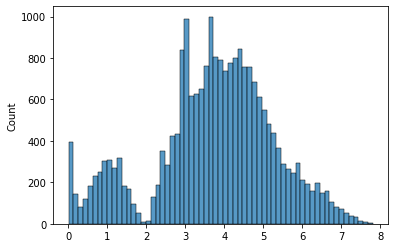

In [7]:
import seaborn as sns
sns.histplot(re)

In [8]:
# Within cluster evaluation
from sklearn.cluster import KMeans
ds1 = KMeans(n_clusters=7)
# mdl_noncohesive = KMeans(n_clusters=2)
ds1.fit(df1.iloc[:,0:3])
# mdl_noncohesive.fit(df_binaryclass_noncohesive.iloc[:,0:2])
pred = ds1.predict(df1.iloc[:,0:3])
# print('SSE Noncohesive Data: '+ str(mdl_noncohesive.inertia_))

In [9]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [10]:
# frame = pd.DataFrame(df1.iloc[:,0:3])
df1['cluster'] = pred
df1['cluster'] = df1['cluster'] +1
df1['cluster'].value_counts()

3    32
5    30
2    30
6    30
1    30
7    30
4    30
Name: cluster, dtype: int64

In [11]:
df1

,X1,X2,X3,Class,cluster
0,-0.063274,0.027734,0.022683,1,3
1,-0.000731,0.048211,0.069198,1,3
2,-0.060767,-0.009080,0.053085,1,3
3,0.013252,-0.011876,0.055324,1,3
4,-0.054508,-0.003813,0.001738,1,3
...,...,...,...,...,...
207,0.175738,-0.053478,-2.733752,7,4
208,0.396046,-0.858377,-3.126866,7,4
209,-0.406362,-0.334541,-2.885598,7,4
210,-0.299275,0.071281,-3.642585,7,4


In [12]:
gp_df = df1.groupby(['Class','cluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})

In [13]:
gp_df

,Class,cluster,counts
0,1,3,32
1,2,5,30
2,3,2,30
3,4,6,30
4,5,1,30
5,6,7,30
6,7,4,30


In [14]:
gp_df1 = gp_df.sort_values(by=['Class','counts'],ascending=[True,False])

In [15]:
gp_df1

,Class,cluster,counts
0,1,3,32
1,2,5,30
2,3,2,30
3,4,6,30
4,5,1,30
5,6,7,30
6,7,4,30


In [16]:
# Contingency table
# • TP : The number of data pairs found in the same cluster,
# both in C and in P
# • FP: The number of data pairs found in the same cluster in
# C but in different clusters in P
# • FN : The number of data pairs found in different clusters
# in C but in the same cluster in P
# • TN : The number of data pairs found in different clusters,
# both in C and in P

In [17]:
# 1 7 TP (1,7)
# 1 3 FP (1,any-7)
# 2 7 FN (any-1,7)
# 2 3 TN (any-1,any-7)

In [18]:
TP,FP,FN,TN=0,0,0,0
for i in gp_df1['Class'].unique():
  tmp = gp_df1[gp_df1.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]
  TP = TP+gp_df1[(gp_df1.Class==T) & (gp_df1.cluster==P)].iloc[0,2] if gp_df1[(gp_df1.Class==T) & (gp_df1.cluster==P)].shape[0]!=0 else TP+0
  FP = FP+gp_df1[(gp_df1.Class==T) & (gp_df1.cluster!=P)].iloc[0,2] if gp_df1[(gp_df1.Class==T) & (gp_df1.cluster!=P)].shape[0]!=0 else FP+0
  FN = FN+gp_df1[(gp_df1.Class!=T) & (gp_df1.cluster==P)].iloc[0,2] if gp_df1[(gp_df1.Class!=T) & (gp_df1.cluster==P)].shape[0]!=0 else FN+0
  TN = TN+gp_df1[(gp_df1.Class!=T) & (gp_df1.cluster!=P)].iloc[0,2] if gp_df1[(gp_df1.Class!=T) & (gp_df1.cluster!=P)].shape[0]!=0 else TN+0

In [19]:
print(TP,FP,FN,TN)

212 0 0 222


In [20]:
print("Accuracy Score = " ,(TP+TN)/(TP+FP+FN+TN))

Accuracy Score =  1.0


In [21]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FP)

In [22]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [23]:
print(F1)

1.0


Text(0.5, 0, 'X3')

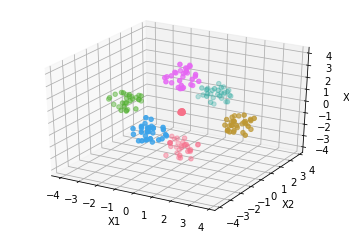

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=7)
km.fit(df1.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 7.0, num=5)
new=np.array(df1.Class)
kplot.scatter3D(df1.X1,df1.X2,df1.X3,label = 'Cluster 1',marker='o',cmap=cmap,c=df1.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

Text(0.5, 0, 'X3')

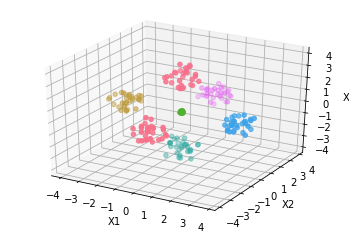

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=7)
km.fit(df1.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 7.0, num=5)
new=np.array(df1.Class)
kplot.scatter3D(df1.X1,df1.X2,df1.X3,label = 'Cluster 1a',marker='o',cmap=cmap,c=df1.cluster)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

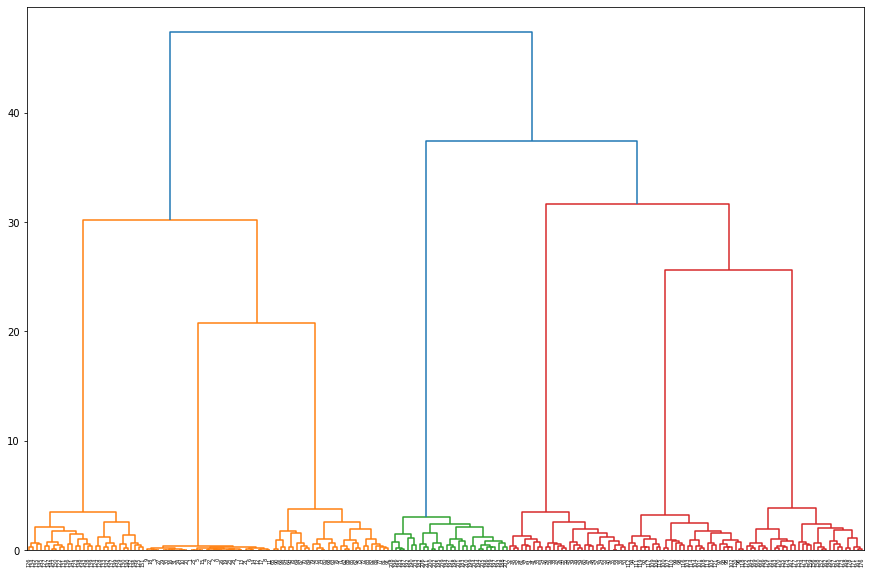

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
#  = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
# y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# data = list(zip(, y))
plt.figure(figsize=(15,10))
linkage_data = linkage(df1, method='ward', metric='euclidean')
dendrogram(linkage_data)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
#plt.axhline(y=30, color = 'r', linestyle = '--')
plt.show()

**Data 2**

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Data2.csv to Data2.csv


In [28]:
import pandas as pd
data2 = pd.read_csv('Data2.csv')
df2 = data2.drop(['Unnamed: 0'],axis=1)

In [29]:
df2

,X,Y,C,Class
0,3.277701,0.814082,0.326574,1
1,0.387577,0.176780,0.888046,1
2,0.268546,0.582963,0.080981,1
3,2.031145,0.244597,0.643921,1
4,0.188677,0.461280,0.496633,1
...,...,...,...,...
399,3.248655,2.297291,3.388138,3
400,4.100000,5.100000,0.504558,4
401,3.900000,4.900000,0.941634,4
402,4.000000,5.000000,0.702123,4


In [30]:
from scipy.spatial.distance import pdist

In [31]:
re = pdist(df2.iloc[:,0:3])
re

array([3.0123448 , 3.02799364, 1.40674234, ..., 0.27814721, 0.28794937,
       0.23327794])

In [32]:
re.shape

(81406,)

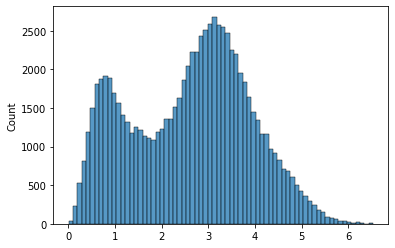

In [33]:
import seaborn as sns
sns.histplot(re)

In [34]:
# Within cluster evaluation
from sklearn.cluster import KMeans
ds2 = KMeans(n_clusters=4)
# mdl_noncohesive = KMeans(n_clusters=2)
ds2.fit(df2.iloc[:,0:3])
# mdl_noncohesive.fit(df_binaryclass_noncohesive.iloc[:,0:2])
pred = ds2.predict(df2.iloc[:,0:3])
# print('SSE Noncohesive Data: '+ str(mdl_noncohesive.inertia_))

In [35]:
pred

array([0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 3,

In [36]:
# frame = pd.DataFrame(df2.iloc[:,0:3])
df2['cluster'] = pred
df2['cluster'] = df2['cluster'] +1
df2['cluster'].value_counts()

3    141
4    100
1     83
2     80
Name: cluster, dtype: int64

In [37]:
df2

,X,Y,C,Class,cluster
0,3.277701,0.814082,0.326574,1,1
1,0.387577,0.176780,0.888046,1,3
2,0.268546,0.582963,0.080981,1,3
3,2.031145,0.244597,0.643921,1,1
4,0.188677,0.461280,0.496633,1,3
...,...,...,...,...,...
399,3.248655,2.297291,3.388138,3,4
400,4.100000,5.100000,0.504558,4,2
401,3.900000,4.900000,0.941634,4,2
402,4.000000,5.000000,0.702123,4,2


In [38]:
gp_df = df2.groupby(['Class','cluster'],as_index=False)['X'].count().rename(columns={'X':'counts'})

In [39]:
gp_df

,Class,cluster,counts
0,1,1,83
1,1,3,117
2,2,2,76
3,2,3,24
4,3,4,100
5,4,2,4


In [40]:
gp_df2 = gp_df.sort_values(by=['Class','counts'],ascending=[True,False])

In [41]:
gp_df2

,Class,cluster,counts
1,1,3,117
0,1,1,83
2,2,2,76
3,2,3,24
4,3,4,100
5,4,2,4


In [42]:
# Contingency table
# • TP : The number of data pairs found in the same cluster,
# both in C and in P
# • FP: The number of data pairs found in the same cluster in
# C but in different clusters in P
# • FN : The number of data pairs found in different clusters
# in C but in the same cluster in P
# • TN : The number of data pairs found in different clusters,
# both in C and in P

In [43]:
# 1 7 TP (1,7)
# 1 3 FP (1,any-7)
# 2 7 FN (any-1,7)
# 2 3 TN (any-1,any-7)

In [44]:
TP,FP,FN,TN=0,0,0,0
for i in gp_df2['Class'].unique():
  tmp = gp_df2[gp_df2.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]
  TP = TP+gp_df2[(gp_df2.Class==T) & (gp_df2.cluster==P)].iloc[0,2] if gp_df2[(gp_df2.Class==T) & (gp_df2.cluster==P)].shape[0]!=0 else TP+0
  FP = FP+gp_df2[(gp_df2.Class==T) & (gp_df2.cluster!=P)].iloc[0,2] if gp_df2[(gp_df2.Class==T) & (gp_df2.cluster!=P)].shape[0]!=0 else FP+0
  FN = FN+gp_df2[(gp_df2.Class!=T) & (gp_df2.cluster==P)].iloc[0,2] if gp_df2[(gp_df2.Class!=T) & (gp_df2.cluster==P)].shape[0]!=0 else FN+0
  TN = TN+gp_df2[(gp_df2.Class!=T) & (gp_df2.cluster!=P)].iloc[0,2] if gp_df2[(gp_df2.Class!=T) & (gp_df2.cluster!=P)].shape[0]!=0 else TN+0

In [45]:
print(TP,FP,FN,TN)

297 107 104 427


In [46]:
print("Accuracy Score = " ,(TP+TN)/(TP+FP+FN+TN))

Accuracy Score =  0.774331550802139


In [47]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FP)

In [48]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [49]:
print(F1)

0.7351485148514851


Text(0.5, 0, 'X3')

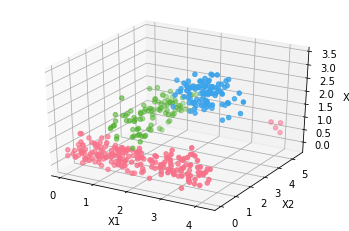

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=4)
km.fit(df2.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 4.0, num=5)
new=np.array(df2.Class)
kplot.scatter3D(df2.X,df2.Y,df2.C,label = 'Cluster 1',marker='o',cmap=cmap,c=df2.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

Text(0.5, 0, 'X3')

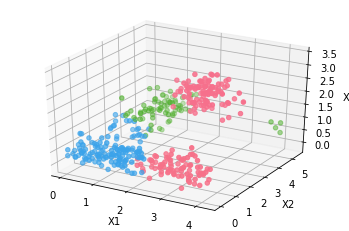

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=4)
km.fit(df2.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 4.0, num=5)
new=np.array(df2.Class)
kplot.scatter3D(df2.X,df2.Y,df2.C,label = 'Cluster 1a',marker='o',cmap=cmap,c=df2.cluster)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

**Data 3**

In [52]:
from google.colab import files
uploaded = files.upload()

Saving Data3.csv to Data3.csv


In [53]:
import pandas as pd
data3 = pd.read_csv('Data3.csv')
df3 = data3.drop(['Unnamed: 0'],axis=1)

In [54]:
df3

,X1,X2,X3,Class
0,1.295428,0.050829,-0.385217,1
1,1.409178,-0.035191,-0.251980,1
2,1.096803,0.246365,-0.415011,1
3,1.463328,0.265354,-0.513488,1
4,1.603284,0.080577,-0.470257,1
...,...,...,...,...
395,0.795695,0.209456,1.880609,4
396,0.653127,-0.703156,1.549448,4
397,-0.726249,-0.103244,0.694300,4
398,0.808596,-0.492640,1.649370,4


In [55]:
from scipy.spatial.distance import pdist

In [56]:
re = pdist(df1.iloc[:,0:3])
re

array([0.08058895, 0.04781043, 0.09214454, ..., 0.86555672, 0.82258187,
       1.11497801])

In [57]:
re.shape

(22366,)

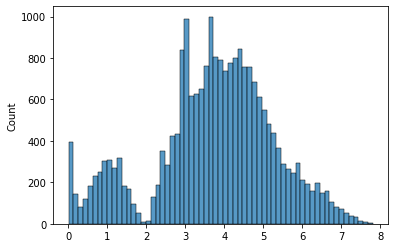

In [58]:
import seaborn as sns
sns.histplot(re)

In [59]:
# Within cluster evaluation
from sklearn.cluster import KMeans
ds3 = KMeans(n_clusters=4)
# mdl_noncohesive = KMeans(n_clusters=2)
ds3.fit(df3.iloc[:,0:3])
# mdl_noncohesive.fit(df_binaryclass_noncohesive.iloc[:,0:2])
pred = ds3.predict(df3.iloc[:,0:3])
# print('SSE Noncohesive Data: '+ str(mdl_noncohesive.inertia_))

In [60]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [61]:
# frame = pd.DataFrame(df2.iloc[:,0:3])
df3['cluster'] = pred
df3['cluster'] = df3['cluster'] +1
df3['cluster'].value_counts()

3    100
2    100
4    100
1    100
Name: cluster, dtype: int64

In [62]:
df3

,X1,X2,X3,Class,cluster
0,1.295428,0.050829,-0.385217,1,3
1,1.409178,-0.035191,-0.251980,1,3
2,1.096803,0.246365,-0.415011,1,3
3,1.463328,0.265354,-0.513488,1,3
4,1.603284,0.080577,-0.470257,1,3
...,...,...,...,...,...
395,0.795695,0.209456,1.880609,4,1
396,0.653127,-0.703156,1.549448,4,1
397,-0.726249,-0.103244,0.694300,4,1
398,0.808596,-0.492640,1.649370,4,1


In [63]:
gp_df = df3.groupby(['Class','cluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})

In [64]:
gp_df

,Class,cluster,counts
0,1,3,100
1,2,2,100
2,3,4,100
3,4,1,100


In [65]:
gp_df3 = gp_df.sort_values(by=['Class','counts'],ascending=[True,False])

In [66]:
gp_df3

,Class,cluster,counts
0,1,3,100
1,2,2,100
2,3,4,100
3,4,1,100


In [67]:
# Contingency table
# • TP : The number of data pairs found in the same cluster,
# both in C and in P
# • FP: The number of data pairs found in the same cluster in
# C but in different clusters in P
# • FN : The number of data pairs found in different clusters
# in C but in the same cluster in P
# • TN : The number of data pairs found in different clusters,
# both in C and in P

In [68]:
# 1 7 TP (1,7)
# 1 3 FP (1,any-7)
# 2 7 FN (any-1,7)
# 2 3 TN (any-1,any-7)

In [69]:
TP,FP,FN,TN=0,0,0,0
for i in gp_df3['Class'].unique():
  tmp = gp_df3[gp_df3.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]
  TP = TP+gp_df3[(gp_df3.Class==T) & (gp_df3.cluster==P)].iloc[0,2] if gp_df3[(gp_df3.Class==T) & (gp_df3.cluster==P)].shape[0]!=0 else TP+0
  FP = FP+gp_df3[(gp_df3.Class==T) & (gp_df3.cluster!=P)].iloc[0,2] if gp_df3[(gp_df3.Class==T) & (gp_df3.cluster!=P)].shape[0]!=0 else FP+0
  FN = FN+gp_df3[(gp_df3.Class!=T) & (gp_df3.cluster==P)].iloc[0,2] if gp_df3[(gp_df3.Class!=T) & (gp_df3.cluster==P)].shape[0]!=0 else FN+0
  TN = TN+gp_df3[(gp_df3.Class!=T) & (gp_df3.cluster!=P)].iloc[0,2] if gp_df3[(gp_df3.Class!=T) & (gp_df3.cluster!=P)].shape[0]!=0 else TN+0

In [70]:
print(TP,FP,FN,TN)

400 0 0 400


In [71]:
print("Accuracy Score = " ,(TP+TN)/(TP+FP+FN+TN))

Accuracy Score =  1.0


In [72]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FP)

In [73]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [74]:
F1

1.0

Text(0.5, 0, 'X3')

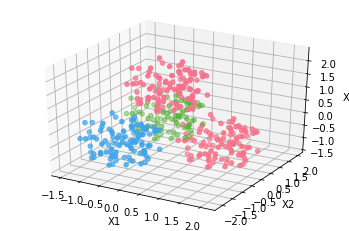

In [75]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=4)
km.fit(df3.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 4.0, num=5)
new=np.array(df3.Class)
kplot.scatter3D(df3.X1,df3.X2,df3.X3,label = 'Cluster 1',marker='o',cmap=cmap,c=df3.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

Text(0.5, 0, 'X3')

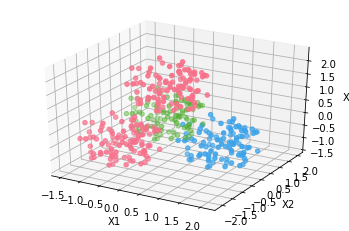

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=4)
km.fit(df3.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 4.0, num=5)
new=np.array(df3.Class)
kplot.scatter3D(df3.X1,df3.X2,df3.X3,label = 'Cluster 1a',marker='o',cmap=cmap,c=df3.cluster)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

**Data 4**

In [77]:
from google.colab import files
uploaded = files.upload()

Saving Data4.csv to Data4.csv


In [78]:
import pandas as pd
data4 = pd.read_csv('Data4.csv')
df4 = data4.drop(['Unnamed: 0'],axis=1)

In [79]:
df4

,X1,X2,X3,Class
0,-0.45300,-0.8910,0.02300,1
1,0.65300,-0.8460,0.02110,1
2,0.39800,0.9130,-0.00139,1
3,0.09520,1.0500,0.00628,1
4,0.52400,-0.9410,0.03780,1
...,...,...,...,...
995,0.01520,0.0531,-0.36100,2
996,0.05160,0.6910,0.87500,2
997,-0.00511,1.3900,-0.94700,2
998,-0.06710,0.7140,0.88100,2


In [80]:
from scipy.spatial.distance import pdist

In [81]:
re = pdist(df4.iloc[:,0:3])
re

array([1.10691671, 1.9947962 , 2.01699871, ..., 1.94997507, 0.98757213,
       1.63621678])

In [82]:
re.shape

(499500,)

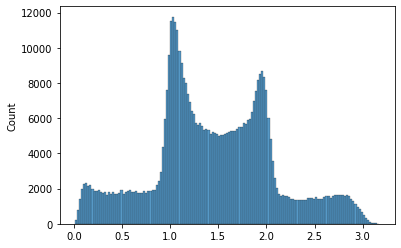

In [83]:
import seaborn as sns
sns.histplot(re)

In [84]:
# Within cluster evaluation
from sklearn.cluster import KMeans
ds4 = KMeans(n_clusters=2)
# mdl_noncohesive = KMeans(n_clusters=2)
ds4.fit(df4.iloc[:,0:3])
# mdl_noncohesive.fit(df_binaryclass_noncohesive.iloc[:,0:2])
pred = ds4.predict(df4.iloc[:,0:3])
# print('SSE Noncohesive Data: '+ str(mdl_noncohesive.inertia_))

In [85]:
pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [86]:
# frame = pd.DataFrame(df1.iloc[:,0:3])
df4['cluster'] = pred
df4['cluster'] = df4['cluster'] +1
df4['cluster'].value_counts()

1    501
2    499
Name: cluster, dtype: int64

In [87]:
df4

,X1,X2,X3,Class,cluster
0,-0.45300,-0.8910,0.02300,1,1
1,0.65300,-0.8460,0.02110,1,1
2,0.39800,0.9130,-0.00139,1,2
3,0.09520,1.0500,0.00628,1,2
4,0.52400,-0.9410,0.03780,1,1
...,...,...,...,...,...
995,0.01520,0.0531,-0.36100,2,1
996,0.05160,0.6910,0.87500,2,2
997,-0.00511,1.3900,-0.94700,2,2
998,-0.06710,0.7140,0.88100,2,2


In [88]:
gp_df = df4.groupby(['Class','cluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})

In [89]:
gp_df

,Class,cluster,counts
0,1,1,327
1,1,2,173
2,2,1,174
3,2,2,326


In [90]:
gp_df4 = gp_df.sort_values(by=['Class','counts'],ascending=[True,False])

In [91]:
gp_df4

,Class,cluster,counts
0,1,1,327
1,1,2,173
3,2,2,326
2,2,1,174


In [92]:
# Contingency table
# • TP : The number of data pairs found in the same cluster,
# both in C and in P
# • FP: The number of data pairs found in the same cluster in
# C but in different clusters in P
# • FN : The number of data pairs found in different clusters
# in C but in the same cluster in P
# • TN : The number of data pairs found in different clusters,
# both in C and in P

In [93]:
# 1 7 TP (1,7)
# 1 3 FP (1,any-7)
# 2 7 FN (any-1,7)
# 2 3 TN (any-1,any-7)

In [94]:
TP,FP,FN,TN=0,0,0,0
for i in gp_df4['Class'].unique():
  tmp = gp_df4[gp_df1.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]
  TP = TP+gp_df4[(gp_df4.Class==T) & (gp_df4.cluster==P)].iloc[0,2] if gp_df4[(gp_df4.Class==T) & (gp_df4.cluster==P)].shape[0]!=0 else TP+0
  FP = FP+gp_df4[(gp_df4.Class==T) & (gp_df4.cluster!=P)].iloc[0,2] if gp_df4[(gp_df4.Class==T) & (gp_df4.cluster!=P)].shape[0]!=0 else FP+0
  FN = FN+gp_df4[(gp_df4.Class!=T) & (gp_df4.cluster==P)].iloc[0,2] if gp_df4[(gp_df4.Class!=T) & (gp_df4.cluster==P)].shape[0]!=0 else FN+0
  TN = TN+gp_df4[(gp_df4.Class!=T) & (gp_df4.cluster!=P)].iloc[0,2] if gp_df4[(gp_df4.Class!=T) & (gp_df4.cluster!=P)].shape[0]!=0 else TN+0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
print(TP,FP,FN,TN)

500 500 500 500


In [96]:
print("Accuracy Score = " ,(TP+TN)/(TP+FP+FN+TN))

Accuracy Score =  0.5


In [97]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FP)

In [98]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [99]:
print(F1)

0.5


Text(0.5, 0, 'X3')

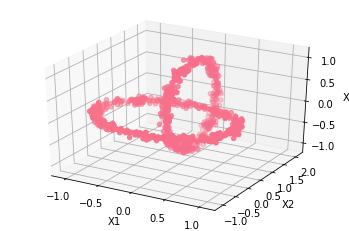

In [100]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=2)
km.fit(df4.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 7.0, num=5)
new=np.array(df4.Class)
kplot.scatter3D(df4.X1,df4.X2,df4.X3,label = 'Cluster 1',marker='o',cmap=cmap,c=df4.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

Text(0.5, 0, 'X3')

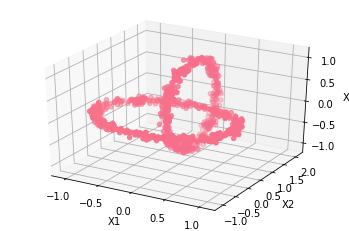

In [101]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=2)
km.fit(df4.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 4.0, num=5)
new=np.array(df4.Class)
kplot.scatter3D(df4.X1,df4.X2,df4.X3,label = 'Cluster 1',marker='o',cmap=cmap,c=df4.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

**Data 5**

In [102]:
from google.colab import files
uploaded = files.upload()

Saving Data5.csv to Data5.csv


In [103]:
import pandas as pd
data5 = pd.read_csv('Data5.csv')
df5 = data5.drop(['Unnamed: 0'],axis=1)

In [104]:
df5

,X1,X2,X3,Class
0,-4.822490,-50.402170,4.020861,1
1,-44.460120,20.964670,-11.492060,1
2,50.001020,0.780748,9.134460,1
3,-41.699080,-22.310060,16.314120,1
4,4.425242,-4.666664,50.223740,1
...,...,...,...,...
795,-1.531027,0.681636,0.543271,2
796,0.500754,-1.848209,0.605654,2
797,1.089574,-0.246493,-3.355758,2
798,-1.907717,4.964502,2.098423,2


In [105]:
from scipy.spatial.distance import pdist

In [106]:
re = pdist(df5.iloc[:,0:3])
re

array([83.09643964, 75.17617474, 47.96012668, ...,  8.11703861,
        5.58934636,  6.50655758])

In [107]:
re.shape

(319600,)

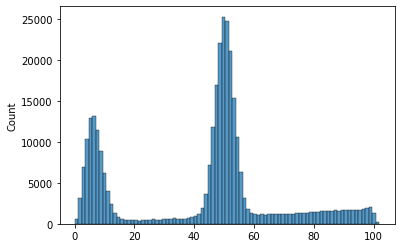

In [108]:
import seaborn as sns
sns.histplot(re)

In [109]:
# Within cluster evaluation
from sklearn.cluster import KMeans
ds5 = KMeans(n_clusters=2)
# mdl_noncohesive = KMeans(n_clusters=2)
ds5.fit(df5.iloc[:,0:3])
# mdl_noncohesive.fit(df_binaryclass_noncohesive.iloc[:,0:2])
pred = ds5.predict(df5.iloc[:,0:3])
# print('SSE Noncohesive Data: '+ str(mdl_noncohesive.inertia_))

In [110]:
pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [111]:
# frame = pd.DataFrame(df1.iloc[:,0:3])
df5['cluster'] = pred
df5['cluster'] = df5['cluster'] +1
df5['cluster'].value_counts()

2    623
1    177
Name: cluster, dtype: int64

In [112]:
df5

,X1,X2,X3,Class,cluster
0,-4.822490,-50.402170,4.020861,1,2
1,-44.460120,20.964670,-11.492060,1,2
2,50.001020,0.780748,9.134460,1,2
3,-41.699080,-22.310060,16.314120,1,1
4,4.425242,-4.666664,50.223740,1,1
...,...,...,...,...,...
795,-1.531027,0.681636,0.543271,2,2
796,0.500754,-1.848209,0.605654,2,2
797,1.089574,-0.246493,-3.355758,2,2
798,-1.907717,4.964502,2.098423,2,2


In [113]:
gp_df = df5.groupby(['Class','cluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})

In [114]:
gp_df

,Class,cluster,counts
0,1,1,177
1,1,2,223
2,2,2,400


In [115]:
gp_df5 = gp_df.sort_values(by=['Class','counts'],ascending=[True,False])

In [116]:
gp_df5

,Class,cluster,counts
1,1,2,223
0,1,1,177
2,2,2,400


In [117]:
# Contingency table
# • TP : The number of data pairs found in the same cluster,
# both in C and in P
# • FP: The number of data pairs found in the same cluster in
# C but in different clusters in P
# • FN : The number of data pairs found in different clusters
# in C but in the same cluster in P
# • TN : The number of data pairs found in different clusters,
# both in C and in P

In [118]:
# 1 7 TP (1,7)
# 1 3 FP (1,any-7)
# 2 7 FN (any-1,7)
# 2 3 TN (any-1,any-7)

In [119]:
TP,FP,FN,TN=0,0,0,0
for i in gp_df5['Class'].unique():
  tmp = gp_df5[gp_df5.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]
  TP = TP+gp_df5[(gp_df5.Class==T) & (gp_df5.cluster==P)].iloc[0,2] if gp_df5[(gp_df5.Class==T) & (gp_df5.cluster==P)].shape[0]!=0 else TP+0
  FP = FP+gp_df5[(gp_df5.Class==T) & (gp_df5.cluster!=P)].iloc[0,2] if gp_df5[(gp_df5.Class==T) & (gp_df5.cluster!=P)].shape[0]!=0 else FP+0
  FN = FN+gp_df5[(gp_df5.Class!=T) & (gp_df5.cluster==P)].iloc[0,2] if gp_df5[(gp_df5.Class!=T) & (gp_df5.cluster==P)].shape[0]!=0 else FN+0
  TN = TN+gp_df5[(gp_df5.Class!=T) & (gp_df5.cluster!=P)].iloc[0,2] if gp_df5[(gp_df5.Class!=T) & (gp_df5.cluster!=P)].shape[0]!=0 else TN+0

In [120]:
print(TP,FP,FN,TN)

623 177 623 177


In [121]:
print("Accuracy Score = " ,(TP+TN)/(TP+FP+FN+TN))

Accuracy Score =  0.5


In [122]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FP)

In [123]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [124]:
print(F1)

0.77875


Text(0.5, 0, 'X3')

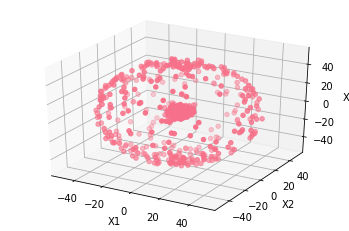

In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=2)
km.fit(df5.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 4.0, num=5)
new=np.array(df5.Class)
kplot.scatter3D(df5.X1,df5.X2,df5.X3,label = 'Cluster 1',marker='o',cmap=cmap,c=df5.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

Text(0.5, 0, 'X3')

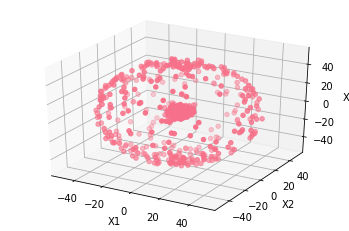

In [126]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=2)
km.fit(df5.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 4.0, num=5)
new=np.array(df5.Class)
kplot.scatter3D(df5.X1,df5.X2,df5.X3,label = 'Cluster 1',marker='o',cmap=cmap,c=df5.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

**Data 6**

In [127]:
from google.colab import files
uploaded = files.upload()

Saving Data6.csv to Data6.csv


In [128]:
import pandas as pd
data6 = pd.read_csv('Data6.csv')
df6 = data6.drop(['Unnamed: 0'],axis=1)

In [129]:
df6

,X1,X2,Class
0,1.388261,2.076096,1
1,2.177247,3.102304,1
2,0.378645,5.307610,1
3,3.681732,1.622681,1
4,2.462861,2.777897,1
...,...,...,...
4091,0.909687,0.375763,2
4092,2.698381,0.511262,2
4093,1.078797,1.526153,2
4094,1.974889,-0.649343,2


In [130]:
from scipy.spatial.distance import pdist

In [131]:
re = pdist(df6.iloc[:,0:3])
re

array([1.29445037, 3.38555862, 2.33786107, ..., 2.35282038, 2.58826025,
       2.10520422])

In [132]:
re.shape

(8386560,)

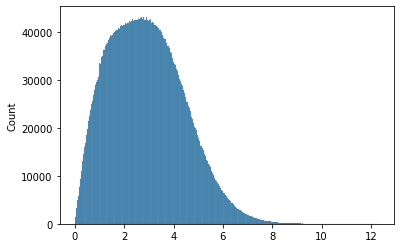

In [133]:
import seaborn as sns
sns.histplot(re)

In [134]:
# Within cluster evaluation
from sklearn.cluster import KMeans
ds6 = KMeans(n_clusters=2)
# mdl_noncohesive = KMeans(n_clusters=2)
ds6.fit(df6.iloc[:,0:3])
# mdl_noncohesive.fit(df_binaryclass_noncohesive.iloc[:,0:2])
pred = ds6.predict(df6.iloc[:,0:3])
# print('SSE Noncohesive Data: '+ str(mdl_noncohesive.inertia_))

In [135]:
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [136]:
# frame = pd.DataFrame(df1.iloc[:,0:3])
df6['cluster'] = pred
df6['cluster'] = df6['cluster'] +1
df6['cluster'].value_counts()

1    2136
2    1960
Name: cluster, dtype: int64

In [137]:
df6

,X1,X2,Class,cluster
0,1.388261,2.076096,1,1
1,2.177247,3.102304,1,1
2,0.378645,5.307610,1,1
3,3.681732,1.622681,1,1
4,2.462861,2.777897,1,1
...,...,...,...,...
4091,0.909687,0.375763,2,2
4092,2.698381,0.511262,2,2
4093,1.078797,1.526153,2,2
4094,1.974889,-0.649343,2,2


In [138]:
gp_df = df6.groupby(['Class','cluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})

In [139]:
gp_df

,Class,cluster,counts
0,1,1,2022
1,1,2,26
2,2,1,114
3,2,2,1934


In [140]:
gp_df6 = gp_df.sort_values(by=['Class','counts'],ascending=[True,False])

In [141]:
gp_df6

,Class,cluster,counts
0,1,1,2022
1,1,2,26
3,2,2,1934
2,2,1,114


In [142]:
# Contingency table
# • TP : The number of data pairs found in the same cluster,
# both in C and in P
# • FP: The number of data pairs found in the same cluster in
# C but in different clusters in P
# • FN : The number of data pairs found in different clusters
# in C but in the same cluster in P
# • TN : The number of data pairs found in different clusters,
# both in C and in P

In [143]:
# 1 7 TP (1,7)
# 1 3 FP (1,any-7)
# 2 7 FN (any-1,7)
# 2 3 TN (any-1,any-7)

In [144]:
TP,FP,FN,TN=0,0,0,0
for i in gp_df6['Class'].unique():
  tmp = gp_df6[gp_df6.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]
  TP = TP+gp_df6[(gp_df6.Class==T) & (gp_df6.cluster==P)].iloc[0,2] if gp_df6[(gp_df6.Class==T) & (gp_df6.cluster==P)].shape[0]!=0 else TP+0
  FP = FP+gp_df6[(gp_df6.Class==T) & (gp_df6.cluster!=P)].iloc[0,2] if gp_df6[(gp_df6.Class==T) & (gp_df6.cluster!=P)].shape[0]!=0 else FP+0
  FN = FN+gp_df6[(gp_df6.Class!=T) & (gp_df6.cluster==P)].iloc[0,2] if gp_df6[(gp_df6.Class!=T) & (gp_df6.cluster==P)].shape[0]!=0 else FN+0
  TN = TN+gp_df6[(gp_df6.Class!=T) & (gp_df6.cluster!=P)].iloc[0,2] if gp_df6[(gp_df6.Class!=T) & (gp_df6.cluster!=P)].shape[0]!=0 else TN+0

In [145]:
print(TP,FP,FN,TN)

3956 140 140 3956


In [146]:
print("Accuracy Score = " ,(TP+TN)/(TP+FP+FN+TN))

Accuracy Score =  0.9658203125


In [147]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FP)

In [148]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [149]:
print(F1)

0.9658203125


Text(0.5, 0, 'X3')

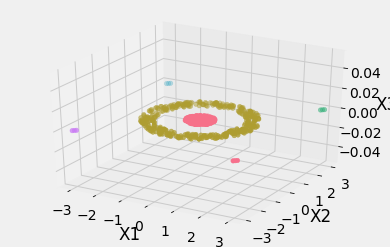

In [280]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=2)
km.fit(df6.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 2.0, num=5)
new=np.array(df6.Class)
kplot.scatter3D(df6.X1,df6.X2,label = 'Cluster 1',marker='o',cmap=cmap,c=df6.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

Text(0.5, 0, 'X3')

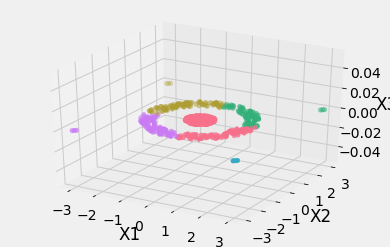

In [281]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=2)
km.fit(df6.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 7.0, num=5)
new=np.array(df6.Class)
kplot.scatter3D(df6.X1,df6.X2,label = 'Cluster 1a',marker='o',cmap=cmap,c=df6.cluster)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

**Data 7**

In [224]:
from google.colab import files
uploaded = files.upload()

Saving Data7.csv to Data7.csv


In [226]:
import pandas as pd
data7 = pd.read_csv('Data7.csv')
df7= data7.drop(['Unnamed: 0'],axis=1)

In [227]:
df7

,X1,X2,Class
0,-3.000000,-3.000000,5
1,-3.000000,3.000000,4
2,3.000000,-3.000000,6
3,3.000000,3.000000,3
4,-0.417091,0.114782,1
...,...,...,...
765,-1.604434,-1.118861,2
766,-3.050000,-3.050000,5
767,-3.050000,2.950000,4
768,2.950000,-3.050000,6


In [228]:
from scipy.spatial.distance import pdist

In [231]:
re = pdist(df7.iloc[:,0:3])
re

array([6.08276253, 6.08276253, 8.71779789, ..., 8.71779789, 6.08276253,
       6.70820393])

In [232]:
re.shape

(296065,)

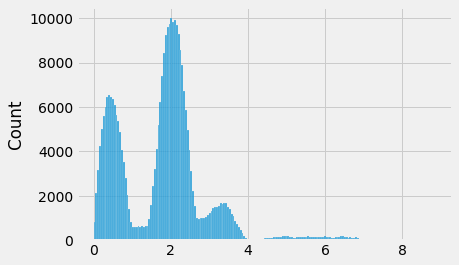

In [233]:
import seaborn as sns
sns.histplot(re)

In [234]:
# Within cluster evaluation
from sklearn.cluster import KMeans
ds7 = KMeans(n_clusters=6)
# mdl_noncohesive = KMeans(n_clusters=2)
ds7.fit(df7.iloc[:,0:3])
# mdl_noncohesive.fit(df_binaryclass_noncohesive.iloc[:,0:2])
pred = ds7.predict(df7.iloc[:,0:3])
# print('SSE Noncohesive Data: '+ str(mdl_noncohesive.inertia_))

In [235]:
pred

array([4, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [237]:
# frame = pd.DataFrame(df1.iloc[:,0:3])
df7['cluster'] = pred
df7['cluster'] = df7['cluster'] +1
df7['cluster'].value_counts()

1    395
2     99
6     94
5     90
3     89
4      3
Name: cluster, dtype: int64

In [238]:
df7

,X1,X2,Class,cluster
0,-3.000000,-3.000000,5,5
1,-3.000000,3.000000,4,2
2,3.000000,-3.000000,6,4
3,3.000000,3.000000,3,3
4,-0.417091,0.114782,1,1
...,...,...,...,...
765,-1.604434,-1.118861,2,5
766,-3.050000,-3.050000,5,5
767,-3.050000,2.950000,4,2
768,2.950000,-3.050000,6,4


In [239]:
gp_df = df7.groupby(['Class','cluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})

In [240]:
gp_df

,Class,cluster,counts
0,1,1,395
1,2,2,96
2,2,3,86
3,2,5,87
4,2,6,94
5,3,3,3
6,4,2,3
7,5,5,3
8,6,4,3


In [241]:
gp_df7 = gp_df.sort_values(by=['Class','counts'],ascending=[True,False])

In [242]:
gp_df7

,Class,cluster,counts
0,1,1,395
1,2,2,96
4,2,6,94
3,2,5,87
2,2,3,86
5,3,3,3
6,4,2,3
7,5,5,3
8,6,4,3


In [243]:
TP,FP,FN,TN=0,0,0,0
for i in gp_df7['Class'].unique():
  tmp = gp_df7[gp_df7.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]
  TP = TP+gp_df7[(gp_df7.Class==T) & (gp_df7.cluster==P)].iloc[0,2] if gp_df7[(gp_df7.Class==T) & (gp_df7.cluster==P)].shape[0]!=0 else TP+0
  FP = FP+gp_df7[(gp_df7.Class==T) & (gp_df7.cluster!=P)].iloc[0,2] if gp_df7[(gp_df7.Class==T) & (gp_df7.cluster!=P)].shape[0]!=0 else FP+0
  FN = FN+gp_df7[(gp_df7.Class!=T) & (gp_df7.cluster==P)].iloc[0,2] if gp_df7[(gp_df7.Class!=T) & (gp_df7.cluster==P)].shape[0]!=0 else FN+0
  TN = TN+gp_df7[(gp_df7.Class!=T) & (gp_df7.cluster!=P)].iloc[0,2] if gp_df7[(gp_df7.Class!=T) & (gp_df7.cluster!=P)].shape[0]!=0 else TN+0

In [244]:
print(TP,FP,FN,TN)

503 94 272 2071


In [245]:
print("Accuracy Score = " ,(TP+TN)/(TP+FP+FN+TN))

Accuracy Score =  0.8755102040816326


In [246]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FP)

In [247]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [248]:
print(F1)

0.8425460636515912


Text(0.5, 0, 'X3')

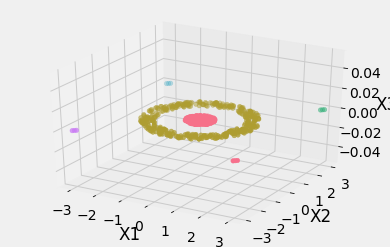

In [282]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=6)
km.fit(df7.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 2.0, num=5)
new=np.array(df7.Class)
kplot.scatter3D(df7.X1,df7.X2,label = 'Cluster 1',marker='o',cmap=cmap,c=df7.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

Text(0.5, 0, 'X3')

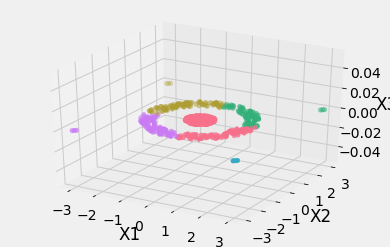

In [284]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=6)
km.fit(df7.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 4.0, num=5)
new=np.array(df7.Class)
kplot.scatter3D(df7.X1,df7.X2,label = 'Cluster 1a',marker='o',cmap=cmap,c=df7.cluster)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

**Data 8**

In [251]:
from google.colab import files
uploaded = files.upload()

Saving Data8.csv to Data8.csv


In [252]:
import pandas as pd
data8 = pd.read_csv('Data8.csv')
df8= data8.drop(['Unnamed: 0'],axis=1)

In [253]:
df8

,X1,X2,X3,Class
0,0.000000,0.000000,1.00000,1
1,0.000000,0.052336,0.99863,1
2,0.049774,0.016173,0.99863,1
3,0.030762,-0.042341,0.99863,1
4,-0.030762,-0.042341,0.99863,1
...,...,...,...,...
3997,0.049774,-0.016173,-0.99863,1
3998,0.000000,-0.052336,-0.99863,1
3999,-0.049774,-0.016173,-0.99863,1
4000,-0.030762,0.042341,-0.99863,1


In [254]:
from scipy.spatial.distance import pdist

In [255]:
re = pdist(df8.iloc[:,0:3])
re

array([0.05235393, 0.05235355, 0.05235397, ..., 0.06152515, 0.05235355,
       0.05235397])

In [256]:
re.shape

(8006001,)

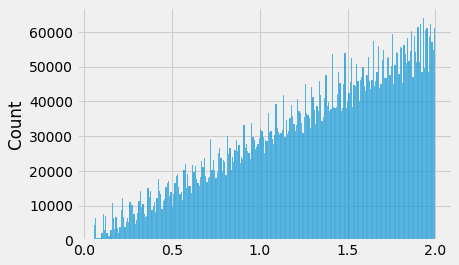

In [257]:
import seaborn as sns
sns.histplot(re)

In [259]:
# Within cluster evaluation
from sklearn.cluster import KMeans
ds8 = KMeans(n_clusters=1)
# mdl_noncohesive = KMeans(n_clusters=2)
ds8.fit(df8.iloc[:,0:3])
# mdl_noncohesive.fit(df_binaryclass_noncohesive.iloc[:,0:2])
pred = ds8.predict(df8.iloc[:,0:3])
# print('SSE Noncohesive Data: '+ str(mdl_noncohesive.inertia_))

In [260]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [261]:
# frame = pd.DataFrame(df1.iloc[:,0:3])
df8['cluster'] = pred
df8['cluster'] = df8['cluster'] +1
df8['cluster'].value_counts()

1    4002
Name: cluster, dtype: int64

In [262]:
df8

,X1,X2,X3,Class,cluster
0,0.000000,0.000000,1.00000,1,1
1,0.000000,0.052336,0.99863,1,1
2,0.049774,0.016173,0.99863,1,1
3,0.030762,-0.042341,0.99863,1,1
4,-0.030762,-0.042341,0.99863,1,1
...,...,...,...,...,...
3997,0.049774,-0.016173,-0.99863,1,1
3998,0.000000,-0.052336,-0.99863,1,1
3999,-0.049774,-0.016173,-0.99863,1,1
4000,-0.030762,0.042341,-0.99863,1,1


In [263]:
gp_df = df8.groupby(['Class','cluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})

In [264]:
gp_df

,Class,cluster,counts
0,1,1,4002


In [266]:
gp_df8 = gp_df.sort_values(by=['Class','counts'],ascending=[True,False])

In [267]:
gp_df8

,Class,cluster,counts
0,1,1,4002


In [268]:
TP,FP,FN,TN=0,0,0,0
for i in gp_df8['Class'].unique():
  tmp = gp_df8[gp_df1.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]
  TP = TP+gp_df8[(gp_df8.Class==T) & (gp_df8.cluster==P)].iloc[0,2] if gp_df8[(gp_df8.Class==T) & (gp_df8.cluster==P)].shape[0]!=0 else TP+0
  FP = FP+gp_df8[(gp_df8.Class==T) & (gp_df8.cluster!=P)].iloc[0,2] if gp_df8[(gp_df8.Class==T) & (gp_df8.cluster!=P)].shape[0]!=0 else FP+0
  FN = FN+gp_df8[(gp_df8.Class!=T) & (gp_df8.cluster==P)].iloc[0,2] if gp_df8[(gp_df8.Class!=T) & (gp_df8.cluster==P)].shape[0]!=0 else FN+0
  TN = TN+gp_df8[(gp_df8.Class!=T) & (gp_df8.cluster!=P)].iloc[0,2] if gp_df8[(gp_df8.Class!=T) & (gp_df8.cluster!=P)].shape[0]!=0 else TN+0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [269]:
print(TP,FP,FN,TN)

4002 0 0 0


In [270]:
print("Accuracy Score = " ,(TP+TN)/(TP+FP+FN+TN))

Accuracy Score =  1.0


In [271]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FP)

In [272]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [273]:
print(F1)

1.0


Text(0.5, 0, 'X3')

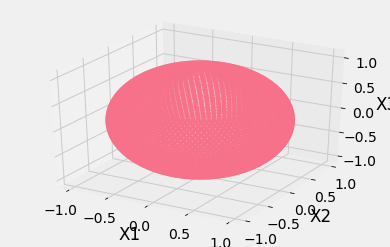

In [274]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=1)
km.fit(df8.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 7.0, num=5)
new=np.array(df8.Class)
kplot.scatter3D(df8.X1,df8.X2,df8.X3,label = 'Cluster 1',marker='o',cmap=cmap,c=df8.Class)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

Text(0.5, 0, 'X3')

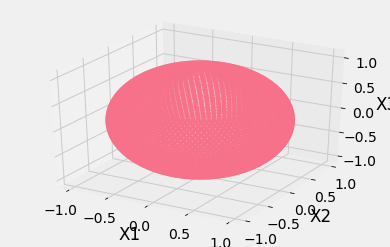

In [275]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
km=KMeans(n_clusters=1)
km.fit(df8.iloc[:,0:3])
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())#setting up a color pallet
np.linspace(0.0, 7.0, num=5)
new=np.array(df8.Class)
kplot.scatter3D(df8.X1,df8.X2,df8.X3,label = 'Cluster 1a',marker='o',cmap=cmap,c=df8.cluster)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.zlabel('X3')
kplot.set_zlabel('X3')

In [150]:
from google.colab import files
uploaded = files.upload()

Saving World Indicators.csv to World Indicators.csv


In [151]:
import pandas as pd
Df = pd.read_csv('World Indicators.csv')
Df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [152]:
Df['Business Tax Rate'] = Df['Business Tax Rate'].str.replace('%', '').astype(float)
Df['GDP'] = Df['GDP'].str.replace('$', '').str.replace(',', '').astype(float)
Df['Health Exp/Capita'] = Df['Health Exp/Capita'].str.replace('$', '').str.replace(',', '').astype(float)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
Df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,NaN,1.039576e+10,0.064,39.0,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5,5.0,2191193.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9,7.0,4430.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8,141.0,70198.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [154]:
Df.dtypes

Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [155]:
percent_missing = Df.isnull().sum() * 100 / len(Df)
missing_value_Df = pd.DataFrame({'column_name': Df.columns,
                                 'percent_missing': percent_missing})

In [156]:
missing_value_Df

,column_name,percent_missing
Birth Rate,Birth Rate,4.326923
Business Tax Rate,Business Tax Rate,12.980769
Days to Start Business,Days to Start Business,12.980769
Energy Usage,Energy Usage,34.615385
GDP,GDP,9.615385
Health Exp % GDP,Health Exp % GDP,11.057692
Health Exp/Capita,Health Exp/Capita,11.057692
Hours to do Tax,Hours to do Tax,13.461538
Infant Mortality Rate,Infant Mortality Rate,9.615385
Internet Usage,Internet Usage,4.326923


In [157]:
Df.drop(['Energy Usage', 'Lending Interest'], axis = 1, inplace = True);

In [158]:
Df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8,141.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [159]:
print(Df.columns)

Index(['Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Urban', 'Region',
       'Country'],
      dtype='object')


In [160]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
for i in ['Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax','Life Expectancy Female',
       'Life Expectancy Male']:
       X = Df[[i]]
       scaledX = scale.fit_transform(X)
       Df[i] = scaledX
# print(scaledX)

In [161]:
Df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.303097,0.762256,-0.094483,-0.127468,-0.823061,-0.459111,0.694945,0.023,0.1,-0.074129,0.109032,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,2.266881,0.207775,0.632108,-0.195607,-1.175366,-0.488423,0.010994,0.107,0.1,-1.961652,-2.038890,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,1.425259,0.592289,-0.023596,-0.265085,-0.787830,-0.565167,-0.037570,0.060,0.0,-1.266249,-1.134502,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.209583,-0.700572,0.525778,-0.259346,-0.541217,-0.367978,-0.515121,0.039,0.1,-2.657055,-2.378036,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,1.892827,-0.031850,-0.307144,-0.262860,-0.118451,-0.562502,-0.037570,0.068,0.0,-1.663622,-1.473648,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,-0.819066,0.051740,-0.448918,10.876610,3.862596,3.929139,-0.373475,0.006,0.7,0.819960,0.900371,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,-0.632039,-0.076432,-0.413475,-0.236423,0.727081,0.063172,0.229535,0.010,0.5,0.720617,0.561226,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,-0.164471,0.505913,1.961240,-0.043215,-0.787830,-0.323744,2.366373,0.014,0.4,0.422587,0.335129,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [162]:
df1 = Df.drop_duplicates()

In [163]:
df1

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.303097,0.762256,-0.094483,-0.127468,-0.823061,-0.459111,0.694945,0.023,0.1,-0.074129,0.109032,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,2.266881,0.207775,0.632108,-0.195607,-1.175366,-0.488423,0.010994,0.107,0.1,-1.961652,-2.038890,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,1.425259,0.592289,-0.023596,-0.265085,-0.787830,-0.565167,-0.037570,0.060,0.0,-1.266249,-1.134502,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.209583,-0.700572,0.525778,-0.259346,-0.541217,-0.367978,-0.515121,0.039,0.1,-2.657055,-2.378036,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,1.892827,-0.031850,-0.307144,-0.262860,-0.118451,-0.562502,-0.037570,0.068,0.0,-1.663622,-1.473648,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,-0.819066,0.051740,-0.448918,10.876610,3.862596,3.929139,-0.373475,0.006,0.7,0.819960,0.900371,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,-0.632039,-0.076432,-0.413475,-0.236423,0.727081,0.063172,0.229535,0.010,0.5,0.720617,0.561226,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,-0.164471,0.505913,1.961240,-0.043215,-0.787830,-0.323744,2.366373,0.014,0.4,0.422587,0.335129,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [164]:
import seaborn as sns
#sns.histplot(data = df1, x = 'Birth Rate')# skewed
#sns.histplot(data = df1, x = 'Business Tax Rate')symmeytry
#sns.histplot(data = df1, x = 'Days to Start Business')skewed
#sns.histplot(data = df1, x = 'GDP')skewed
#sns.histplot(data = df1, x = 'Health Exp % GDP')symmetry
#sns.histplot(data = df1, x = 'Health Exp/Capita')skewed
#sns.histplot(data = df1, x = 'Hours to do Tax')symmetry
#sns.histplot(data = df1, x = 'Infant Mortality Rate')skewed
#sns.histplot(data = df1, x = 'Internet Usage')symmetry
#sns.histplot(data = df1, x = 'Life Expectancy Female')skewed
#sns.histplot(data = df1, x = 'Life Expectancy Male')skewed
#sns.histplot(data = df1, x = 'Mobile Phone Usage')symmetry
#sns.histplot(data = df1, x = 'Population 0-14')symmetry
#sns.histplot(data = df1, x = 'Population 15-64')symmetry
#sns.histplot(data = df1, x = 'Population 65+')skewed
#sns.histplot(data = df1, x = 'Population Urban')symmetry


In [165]:
df1

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.303097,0.762256,-0.094483,-0.127468,-0.823061,-0.459111,0.694945,0.023,0.1,-0.074129,0.109032,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,2.266881,0.207775,0.632108,-0.195607,-1.175366,-0.488423,0.010994,0.107,0.1,-1.961652,-2.038890,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,1.425259,0.592289,-0.023596,-0.265085,-0.787830,-0.565167,-0.037570,0.060,0.0,-1.266249,-1.134502,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.209583,-0.700572,0.525778,-0.259346,-0.541217,-0.367978,-0.515121,0.039,0.1,-2.657055,-2.378036,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,1.892827,-0.031850,-0.307144,-0.262860,-0.118451,-0.562502,-0.037570,0.068,0.0,-1.663622,-1.473648,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,-0.819066,0.051740,-0.448918,10.876610,3.862596,3.929139,-0.373475,0.006,0.7,0.819960,0.900371,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,-0.632039,-0.076432,-0.413475,-0.236423,0.727081,0.063172,0.229535,0.010,0.5,0.720617,0.561226,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,-0.164471,0.505913,1.961240,-0.043215,-0.787830,-0.323744,2.366373,0.014,0.4,0.422587,0.335129,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [166]:
df1['Business Tax Rate'].fillna(df1['Business Tax Rate'].mean(),inplace=True)

In [167]:
df1['Birth Rate'].fillna(df1['Birth Rate'].median(), inplace=True)

In [168]:
df1['Days to Start Business'].fillna(df1['Days to Start Business'].median(), inplace=True)

In [169]:
df3 = pd.DataFrame(columns=df1.columns)
for i in df1['Region'].unique():
  median1 = df1[df1['Region']==i]['Health Exp % GDP'].median()
  median2 = df1[df1['Region']==i]['Health Exp % GDP'].median()
  # print(median)
  df2 = df1[df1['Region']==i]
  df2['GDP'].fillna(median1,inplace=True)
  df2['Health Exp % GDP'].fillna(median2,inplace=True)
  df3 = pd.concat([df3,df2])


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [170]:
df3

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.303097,7.622560e-01,-0.094483,-0.127468,-0.823061,-0.459111,0.694945,0.023,0.1,-0.074129,0.109032,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,2.266881,2.077747e-01,0.632108,-0.195607,-1.175366,-0.488423,0.010994,0.107,0.1,-1.961652,-2.038890,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,1.425259,5.922894e-01,-0.023596,-0.265085,-0.787830,-0.565167,-0.037570,0.060,0.0,-1.266249,-1.134502,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.209583,-7.005717e-01,0.525778,-0.259346,-0.541217,-0.367978,-0.515121,0.039,0.1,-2.657055,-2.378036,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,1.892827,-3.185047e-02,-0.307144,-0.262860,-0.118451,-0.562502,-0.037570,0.068,0.0,-1.663622,-1.473648,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.257985,-5.888476e-17,-0.218536,0.022471,0.022471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,-0.819066,5.173969e-02,-0.448918,10.876610,3.862596,3.929139,-0.373475,0.006,0.7,0.819960,0.900371,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,-0.632039,-7.643188e-02,-0.413475,-0.236423,0.727081,0.063172,0.229535,0.010,0.5,0.720617,0.561226,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,-0.164471,5.059129e-01,1.961240,-0.043215,-0.787830,-0.323744,2.366373,0.014,0.4,0.422587,0.335129,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [171]:
df3['Health Exp/Capita'].fillna(df3['Health Exp/Capita'].median(), inplace=True)

In [172]:
df3['Hours to do Tax'].fillna(df3['Hours to do Tax'].mean(), inplace=True)

In [173]:
df3['Infant Mortality Rate'].fillna(df3['Infant Mortality Rate'].median(), inplace=True)

In [174]:
df3['Internet Usage'].fillna(df3['Internet Usage'].mean(), inplace=True)

In [175]:
df3['Life Expectancy Female'].fillna(df3['Life Expectancy Female'].median(), inplace=True)

In [176]:
df3['Life Expectancy Male'].fillna(df3['Life Expectancy Male'].median(), inplace=True)

In [177]:
df3['Mobile Phone Usage'].fillna(df3['Mobile Phone Usage'].mean(), inplace=True)

In [178]:
df3['Population 0-14'].fillna(df3['Population 0-14'].mean(), inplace=True)

In [179]:
df3['Population 15-64'].fillna(df3['Population 15-64'].mean(), inplace=True)

In [180]:
df3['Population 65+'].fillna(df3['Population 65+'].median(), inplace=True)

In [181]:
df3['Population Urban'].fillna(df3['Population Urban'].mean(), inplace=True)

In [182]:
df3

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.303097,7.622560e-01,-0.094483,-0.127468,-0.823061,-0.459111,6.949446e-01,0.023,0.100000,-0.074129,0.109032,0.900000,0.272000,0.68100,0.047,0.682,Africa,Algeria
1,2.266881,2.077747e-01,0.632108,-0.195607,-1.175366,-0.488423,1.099446e-02,0.107,0.100000,-1.961652,-2.038890,0.500000,0.477000,0.49900,0.024,0.409,Africa,Angola
2,1.425259,5.922894e-01,-0.023596,-0.265085,-0.787830,-0.565167,-3.757004e-02,0.060,0.000000,-1.266249,-1.134502,0.800000,0.432000,0.53900,0.029,0.423,Africa,Benin
3,0.209583,-7.005717e-01,0.525778,-0.259346,-0.541217,-0.367978,-5.151210e-01,0.039,0.100000,-2.657055,-2.378036,1.500000,0.340000,0.62500,0.035,0.565,Africa,Botswana
4,1.892827,-3.185047e-02,-0.307144,-0.262860,-0.118451,-0.562502,-3.757004e-02,0.068,0.000000,-1.663622,-1.473648,0.500000,0.458000,0.51700,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.257985,-5.888476e-17,-0.218536,0.022471,0.022471,-0.417542,-9.375217e-17,0.016,0.376884,0.323244,0.222080,0.958673,0.286963,0.63555,0.056,0.907,The Americas,Turks and Caicos Islands
204,-0.819066,5.173969e-02,-0.448918,10.876610,3.862596,3.929139,-3.734745e-01,0.006,0.700000,0.819960,0.900371,0.900000,0.197000,0.66900,0.133,0.809,The Americas,United States
205,-0.632039,-7.643188e-02,-0.413475,-0.236423,0.727081,0.063172,2.295347e-01,0.010,0.500000,0.720617,0.561226,1.400000,0.223000,0.63800,0.139,0.946,The Americas,Uruguay
206,-0.164471,5.059129e-01,1.961240,-0.043215,-0.787830,-0.323744,2.366373e+00,0.014,0.400000,0.422587,0.335129,1.000000,0.291000,0.65100,0.058,0.888,The Americas,"Venezuela, RB"


In [183]:
percent_missing = df3.isnull().sum() * 100 / len(df3)
missing_value_Df = pd.DataFrame({'column_name': df3.columns,
                                 'percent_missing': percent_missing})

In [184]:
missing_value_Df

,column_name,percent_missing
Birth Rate,Birth Rate,0.0
Business Tax Rate,Business Tax Rate,0.0
Days to Start Business,Days to Start Business,0.0
GDP,GDP,0.0
Health Exp % GDP,Health Exp % GDP,0.0
Health Exp/Capita,Health Exp/Capita,0.0
Hours to do Tax,Hours to do Tax,0.0
Infant Mortality Rate,Infant Mortality Rate,0.0
Internet Usage,Internet Usage,0.0
Life Expectancy Female,Life Expectancy Female,0.0


In [185]:
df2 = df3.drop(['Country'], axis = 1);

In [186]:
df2

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
0,0.303097,7.622560e-01,-0.094483,-0.127468,-0.823061,-0.459111,6.949446e-01,0.023,0.100000,-0.074129,0.109032,0.900000,0.272000,0.68100,0.047,0.682,Africa
1,2.266881,2.077747e-01,0.632108,-0.195607,-1.175366,-0.488423,1.099446e-02,0.107,0.100000,-1.961652,-2.038890,0.500000,0.477000,0.49900,0.024,0.409,Africa
2,1.425259,5.922894e-01,-0.023596,-0.265085,-0.787830,-0.565167,-3.757004e-02,0.060,0.000000,-1.266249,-1.134502,0.800000,0.432000,0.53900,0.029,0.423,Africa
3,0.209583,-7.005717e-01,0.525778,-0.259346,-0.541217,-0.367978,-5.151210e-01,0.039,0.100000,-2.657055,-2.378036,1.500000,0.340000,0.62500,0.035,0.565,Africa
4,1.892827,-3.185047e-02,-0.307144,-0.262860,-0.118451,-0.562502,-3.757004e-02,0.068,0.000000,-1.663622,-1.473648,0.500000,0.458000,0.51700,0.025,0.265,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.257985,-5.888476e-17,-0.218536,0.022471,0.022471,-0.417542,-9.375217e-17,0.016,0.376884,0.323244,0.222080,0.958673,0.286963,0.63555,0.056,0.907,The Americas
204,-0.819066,5.173969e-02,-0.448918,10.876610,3.862596,3.929139,-3.734745e-01,0.006,0.700000,0.819960,0.900371,0.900000,0.197000,0.66900,0.133,0.809,The Americas
205,-0.632039,-7.643188e-02,-0.413475,-0.236423,0.727081,0.063172,2.295347e-01,0.010,0.500000,0.720617,0.561226,1.400000,0.223000,0.63800,0.139,0.946,The Americas
206,-0.164471,5.059129e-01,1.961240,-0.043215,-0.787830,-0.323744,2.366373e+00,0.014,0.400000,0.422587,0.335129,1.000000,0.291000,0.65100,0.058,0.888,The Americas


In [187]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df2['Region']= label_encoder.fit_transform(df2['Region'])

df2['Region'].unique()


array([0, 1, 2, 3, 4, 5])

In [188]:
df2

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
0,0.303097,7.622560e-01,-0.094483,-0.127468,-0.823061,-0.459111,6.949446e-01,0.023,0.100000,-0.074129,0.109032,0.900000,0.272000,0.68100,0.047,0.682,0
1,2.266881,2.077747e-01,0.632108,-0.195607,-1.175366,-0.488423,1.099446e-02,0.107,0.100000,-1.961652,-2.038890,0.500000,0.477000,0.49900,0.024,0.409,0
2,1.425259,5.922894e-01,-0.023596,-0.265085,-0.787830,-0.565167,-3.757004e-02,0.060,0.000000,-1.266249,-1.134502,0.800000,0.432000,0.53900,0.029,0.423,0
3,0.209583,-7.005717e-01,0.525778,-0.259346,-0.541217,-0.367978,-5.151210e-01,0.039,0.100000,-2.657055,-2.378036,1.500000,0.340000,0.62500,0.035,0.565,0
4,1.892827,-3.185047e-02,-0.307144,-0.262860,-0.118451,-0.562502,-3.757004e-02,0.068,0.000000,-1.663622,-1.473648,0.500000,0.458000,0.51700,0.025,0.265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.257985,-5.888476e-17,-0.218536,0.022471,0.022471,-0.417542,-9.375217e-17,0.016,0.376884,0.323244,0.222080,0.958673,0.286963,0.63555,0.056,0.907,5
204,-0.819066,5.173969e-02,-0.448918,10.876610,3.862596,3.929139,-3.734745e-01,0.006,0.700000,0.819960,0.900371,0.900000,0.197000,0.66900,0.133,0.809,5
205,-0.632039,-7.643188e-02,-0.413475,-0.236423,0.727081,0.063172,2.295347e-01,0.010,0.500000,0.720617,0.561226,1.400000,0.223000,0.63800,0.139,0.946,5
206,-0.164471,5.059129e-01,1.961240,-0.043215,-0.787830,-0.323744,2.366373e+00,0.014,0.400000,0.422587,0.335129,1.000000,0.291000,0.65100,0.058,0.888,5


In [189]:
from scipy.spatial.distance import pdist

In [190]:
re = pdist(df2.iloc[:,0:17])
re

array([3.71252161, 2.22783095, 4.16432281, ..., 3.68371535, 1.20005441,
       3.56090083])

In [191]:
re.shape

(21528,)

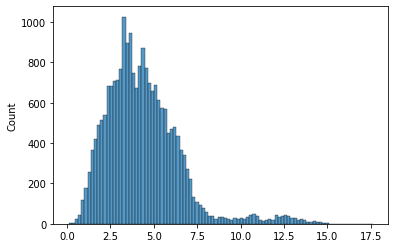

In [192]:
import seaborn as sns
sns.histplot(re)

In [193]:
from sklearn.cluster import KMeans

In [194]:

sse = []
for k in range(1, 11):
  ds1 = KMeans(n_clusters=k)
  ds1.fit(df2.iloc[:,0:17])
  sse.append(ds1.inertia_)

In [195]:
print(sse)

[2493.8752575401277, 1668.9209339463346, 1356.9016670266221, 1156.470586649441, 1018.9424558633667, 894.8050239586615, 772.2973183830622, 696.4453282499956, 602.8817399265918, 568.0087537957289]


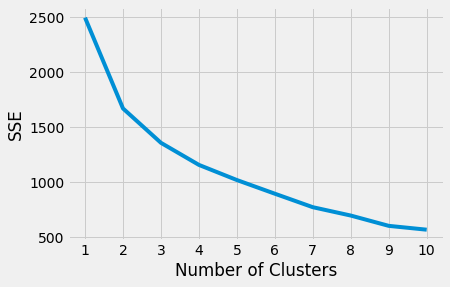

In [196]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [197]:
from sklearn import metrics
print('CH Cohesive Data: '+ str(metrics.calinski_harabasz_score(df2.iloc[:,0:17], ds1.labels_)))
# print('CH Noncohesive Data: '+ str(metrics.calinski_harabasz_score(df1.iloc[:,0:3], ds1.labels_)))

CH Cohesive Data: 74.5922713325186


In [198]:
chc = []
for k in range(2, 11):
  ds1 = KMeans(n_clusters=k)
  ds1.fit(df2.iloc[:,0:17])
  chc.append(metrics.calinski_harabasz_score(df2.iloc[:,0:17], ds1.labels_))

In [199]:
print(chc)

[101.82662773513147, 85.88669014093543, 78.62724328547506, 73.47942293141222, 72.04674155065673, 74.70356414208092, 72.40247246763369, 78.01362956578704, 75.69548013284177]


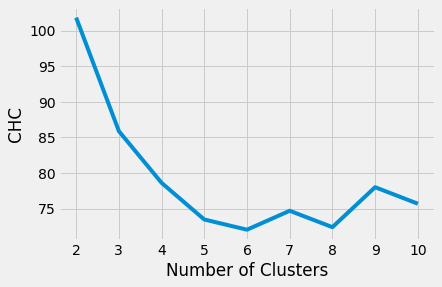

In [200]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), chc)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("CHC")
plt.show()

In [201]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [202]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist_cohesive = pairwise_distances(df2.iloc[:,0:17])
dunn_cohesive = dunn(dist_cohesive,  ds1.labels_)
print('DI Cohesive Data: '+ str(dunn_cohesive))

DI Cohesive Data: 0.15392529741076824


In [203]:
di = []
for k in range(2, 11):
  ds1 = KMeans(n_clusters=k)
  ds1.fit(df2.iloc[:,0:17])
  dist_cohesive = pairwise_distances(df2.iloc[:,0:17])
  dunn_cohesive = dunn(dist_cohesive,  ds1.labels_)
  di.append(dunn_cohesive)

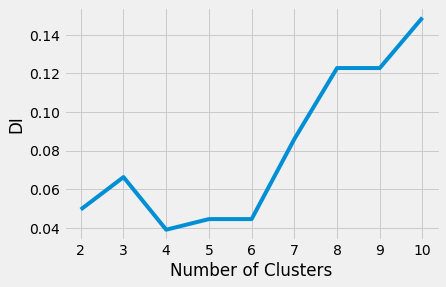

In [204]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), di)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("DI")
plt.show()

In [205]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df2.iloc[:,0:17])
  labels = kmeans.labels_
  sil.append(silhouette_score(df2.iloc[:,0:17], labels, metric ='euclidean'))

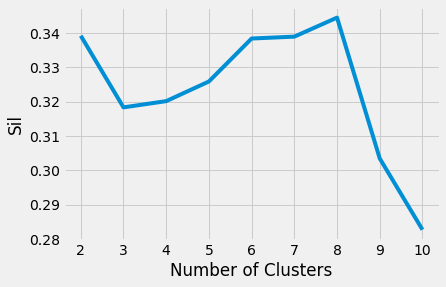

In [206]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sil)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sil")
plt.show()

In [207]:
kmeans = KMeans(n_clusters = 7).fit(df2.iloc[:,0:17])

In [208]:
pred = kmeans.predict(df2.iloc[:,0:17])
df2['predicted_cluster'] = pred

In [209]:
df2

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,predicted_cluster
0,0.303097,7.622560e-01,-0.094483,-0.127468,-0.823061,-0.459111,6.949446e-01,0.023,0.100000,-0.074129,0.109032,0.900000,0.272000,0.68100,0.047,0.682,0,0
1,2.266881,2.077747e-01,0.632108,-0.195607,-1.175366,-0.488423,1.099446e-02,0.107,0.100000,-1.961652,-2.038890,0.500000,0.477000,0.49900,0.024,0.409,0,3
2,1.425259,5.922894e-01,-0.023596,-0.265085,-0.787830,-0.565167,-3.757004e-02,0.060,0.000000,-1.266249,-1.134502,0.800000,0.432000,0.53900,0.029,0.423,0,3
3,0.209583,-7.005717e-01,0.525778,-0.259346,-0.541217,-0.367978,-5.151210e-01,0.039,0.100000,-2.657055,-2.378036,1.500000,0.340000,0.62500,0.035,0.565,0,3
4,1.892827,-3.185047e-02,-0.307144,-0.262860,-0.118451,-0.562502,-3.757004e-02,0.068,0.000000,-1.663622,-1.473648,0.500000,0.458000,0.51700,0.025,0.265,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.257985,-5.888476e-17,-0.218536,0.022471,0.022471,-0.417542,-9.375217e-17,0.016,0.376884,0.323244,0.222080,0.958673,0.286963,0.63555,0.056,0.907,5,1
204,-0.819066,5.173969e-02,-0.448918,10.876610,3.862596,3.929139,-3.734745e-01,0.006,0.700000,0.819960,0.900371,0.900000,0.197000,0.66900,0.133,0.809,5,4
205,-0.632039,-7.643188e-02,-0.413475,-0.236423,0.727081,0.063172,2.295347e-01,0.010,0.500000,0.720617,0.561226,1.400000,0.223000,0.63800,0.139,0.946,5,1
206,-0.164471,5.059129e-01,1.961240,-0.043215,-0.787830,-0.323744,2.366373e+00,0.014,0.400000,0.422587,0.335129,1.000000,0.291000,0.65100,0.058,0.888,5,6


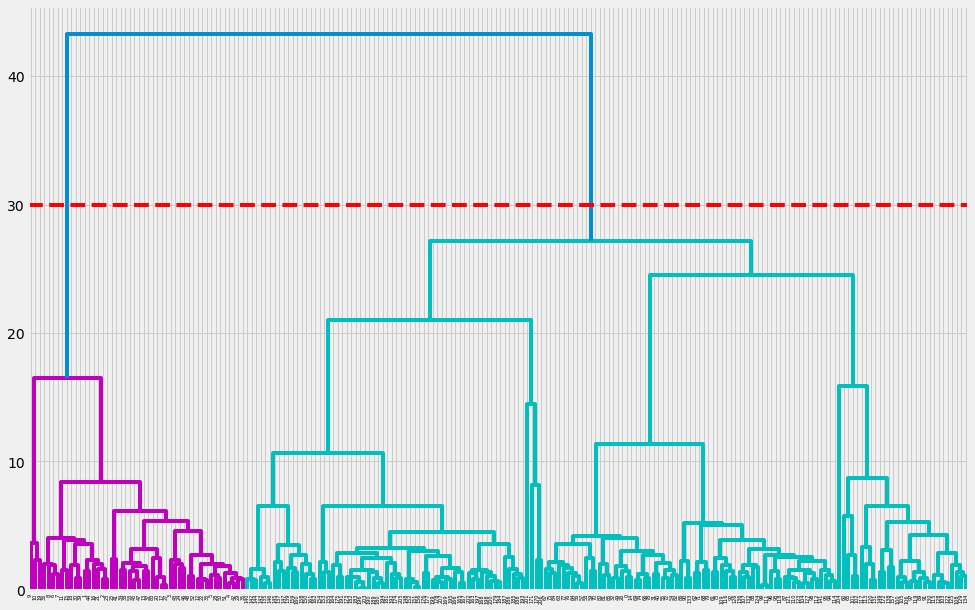

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
#  = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
# y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# data = list(zip(, y))
plt.figure(figsize=(15,10))
linkage_data = linkage(df2, method='ward', metric='euclidean')
dendrogram(linkage_data)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.axhline(y=30, color = 'r', linestyle = '--')
plt.show()

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
# y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# data = list(zip(df2.columns))

hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df2)

# plt.scatter(x, y, c=labels)
# plt.show()

In [212]:
print(labels)

[3 2 2 2 2 2 2 2 2 5 5 2 2 2 3 2 2 2 2 5 2 2 2 2 2 2 3 2 2 2 2 3 3 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 0 3 0 3 3 3 3 3 0 3 3 0 0 0 0 3 0 0 3 0 3 3
 3 3 0 3 0 3 0 3 0 0 3 0 3 3 0 3 3 0 0 0 0 3 3 0 4 3 4 0 4 4 3 4 4 4 4 4 4
 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 1 1 0 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 0 4 1 4]


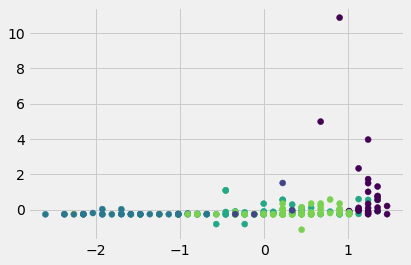

In [213]:
plt.scatter(df2['Life Expectancy Male'], df2['GDP'], c=labels)
plt.show()

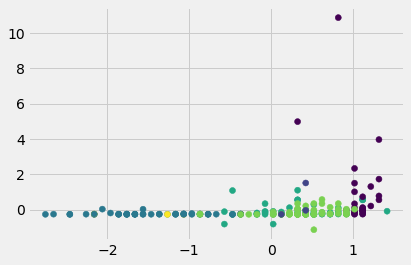

In [214]:
plt.scatter(df2['Life Expectancy Female'], df2['GDP'], c=labels)
plt.show()

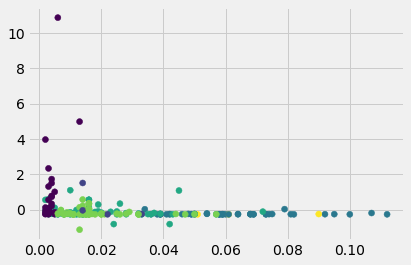

In [215]:
plt.scatter(df2['Infant Mortality Rate'], df2['GDP'], c=labels)
plt.show()